I took a dataset from kaggle, labeled "Top Spotify songs" (https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?resource=download). It contains the top songs by year in the world by spotify. This dataset has several variables about the songs and is based on Billboard.

- ID: song id
- title: title of the song
- artist: artist of the song
- top genre: the genre of the track
- year: Song's year in the Billboard
- bpm: Beats.Per.Minute - The tempo of the song.
- Energy: The energy of a song - the higher the value, the more energtic. song
- dnce: Danceability - The higher the value, the easier it is to dance to this song.
- dB: Loudness - The higher the value, the louder the song
- live: Liveness - The higher the value, the more likely the song is a live recording
- Valence - The higher the value, the more positive mood for the song.
- Length - The duration of the song.
- Acousticness - The higher the value the more acoustic the song is.
- Speechiness - The higher the value the more spoken word the song contains. 
- duration: length of the song

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
songs = pd.read_csv('data/top_songs.csv', encoding='windows-1252')
songs


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
songs.head(10)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [4]:
songs.sample(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
468,469,Swish Swish,Katy Perry,dance pop,2017,120,71,84,-5,10,57,243,2,4,73
536,537,Tequila,Dan + Shay,contemporary country,2018,86,59,47,-6,13,50,196,3,3,76
207,208,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36
450,451,Mercy,Shawn Mendes,canadian pop,2017,148,66,56,-5,11,36,209,13,8,81
200,201,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50


In [5]:
songs.shape

(603, 15)

In [6]:
# Drop the "Unnamed: 0" column
songs = songs.drop("Unnamed: 0", axis=1)

In [7]:
#check for dublicates
duplicateRows = songs[songs.duplicated()]
duplicateRows

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop


In [8]:
#check for empty cells
songs[songs.isna().any(axis=1)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop


In [9]:
#check the column data types
songs.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

# possible research questions:
- What genres are present? what are the most common genres?
- How does the popularity (pop) of songs vary across different genres (top genre)?
- Which artists are popular over time?
- What is the average energy (nrgy) and danceability (dnce) of different genres?
- Does the popularity (pop) of a song correlate with its energy level (nrgy)?
- Is there a relationship between the tempo (bpm) and energy (nrgy) of songs?


- does the bpm correlate with a genre?
- do the genres popular in a year stay the same over time?

7-10 - one = prediction/classification

## what genres are present? what are the most common genres?

In [10]:
songs["top genre"].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

All the genres present in the dataset are listed above. Now we have a look at the most popular songs in the pop genre sorted by popularity. 

In [11]:
songs_pop = songs[songs['top genre']=='pop']
songs_pop_sorted = songs_pop.sort_values(by='pop', ascending=False)
songs_pop_sorted.head(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
443,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
584,Beautiful People (feat. Khalid),Ed Sheeran,pop,2019,93,65,64,-8,8,55,198,12,19,86
211,Stay With Me,Sam Smith,pop,2014,84,42,42,-6,11,18,173,59,4,85
587,I Don't Care (with Justin Bieber),Ed Sheeran,pop,2019,102,68,80,-5,9,84,220,9,4,85
510,I Like It,Cardi B,pop,2018,136,73,82,-4,37,65,253,10,13,85
269,I'm Not The Only One,Sam Smith,pop,2015,82,49,68,-6,8,49,239,53,4,84


The following code puts out the songs mit the highest bpm values. 

In [12]:
max_bpm = songs['bpm'].max()
song_with_max_bpm = songs[songs['bpm'] == max_bpm]
song_with_max_bpm

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80


In [13]:
songs[songs['bpm'] > 200].head(10) #output: songs with bpm > 200

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


In [14]:
most_frequent_genres = songs["top genre"].value_counts()
# Display the most frequent genres
most_frequent_genres

top genre
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2


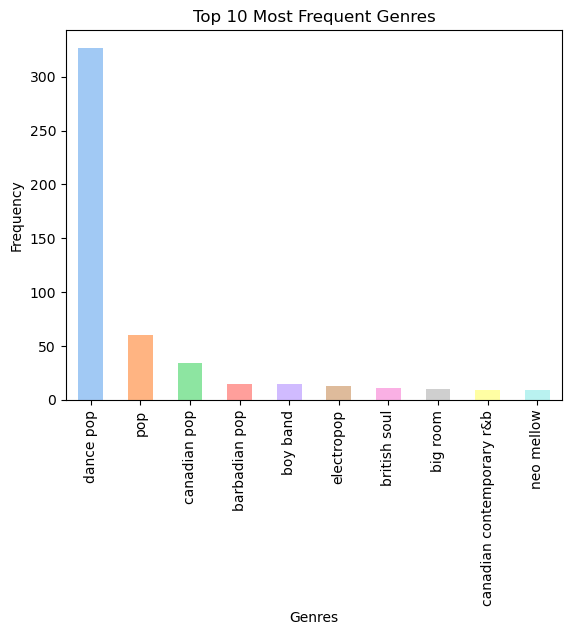

In [15]:
#visualization of the results above
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

colors = sns.color_palette('pastel')[:10]
most_frequent_genres[:10].plot(kind='bar', color = colors)

plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Genres')

plt.show()

For comparison, the 10 most popular songs in the dance pop genre sorted by popularity are put out with the following code. One visible difference is, that songs from the dance pop genre have a higher bpm, which may be a difference defining the genre. 

In [16]:
songs_dancepop = songs[songs['top genre']=='dance pop']
songs_dancepop_sorted = songs_dancepop.sort_values(by='pop', ascending=False)
songs_dancepop_sorted.head(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
573,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
139,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
508,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
586,Don't Call Me Up,Mabel,dance pop,2019,99,88,67,-3,8,23,178,30,15,86
509,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,105,52,77,-4,13,39,217,18,3,85
514,IDGAF,Dua Lipa,dance pop,2018,97,54,84,-6,8,51,218,4,9,84
513,no tears left to cry,Ariana Grande,dance pop,2018,122,71,70,-6,29,35,206,4,6,84
589,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84
511,New Rules,Dua Lipa,dance pop,2018,116,70,76,-6,15,61,209,0,7,84
518,Attention,Charlie Puth,dance pop,2018,100,61,78,-5,13,80,209,11,5,83


Now, the 10 most frequent genres are visualized.

## How does the popularity (pop) of songs vary across different genres (top genre)?

In [17]:
genre_popularity = songs.groupby('top genre')['pop'].mean()

sorted_genre_popularity = genre_popularity.sort_values(ascending=False)

sorted_genre_popularity


top genre
escape room                  90.000000
brostep                      86.000000
alternative r&b              84.000000
irish singer-songwriter      81.000000
danish pop                   80.000000
celtic rock                  80.000000
electronic trap              79.500000
edm                          78.200000
canadian contemporary r&b    77.666667
electropop                   77.461538
contemporary country         76.000000
pop                          74.833333
electro                      74.500000
detroit hip hop              73.500000
canadian hip hop             73.500000
metropopolis                 73.000000
chicago rap                  73.000000
canadian pop                 72.235294
house                        72.000000
tropical house               71.666667
electro house                70.000000
hip hop                      70.000000
australian hip hop           70.000000
boy band                     69.666667
indie pop                    69.500000
baroque pop    

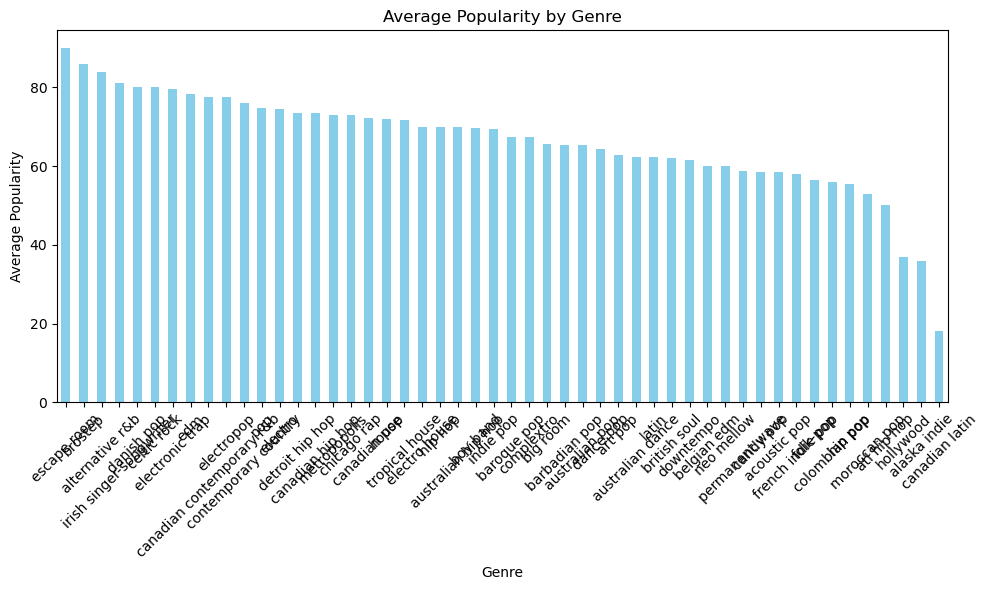

In [18]:
plt.figure(figsize=(10, 6))
sorted_genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interestingly, the most common genres are not the most popular. 

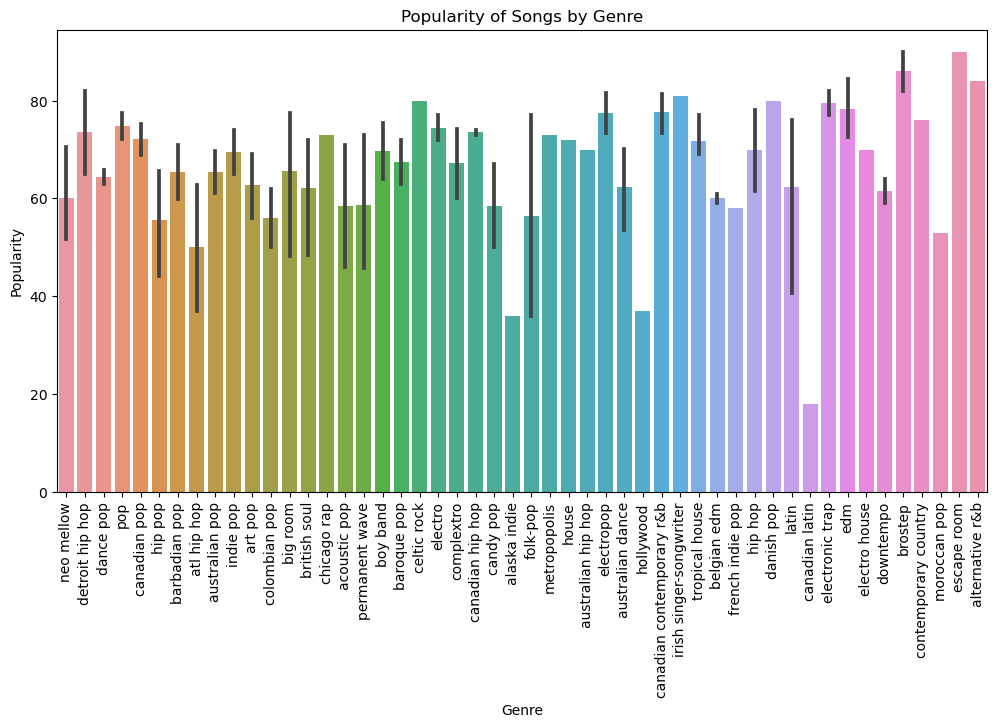

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='top genre', y='pop', data=songs)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity of Songs by Genre')
plt.xticks(rotation=90)
plt.show()

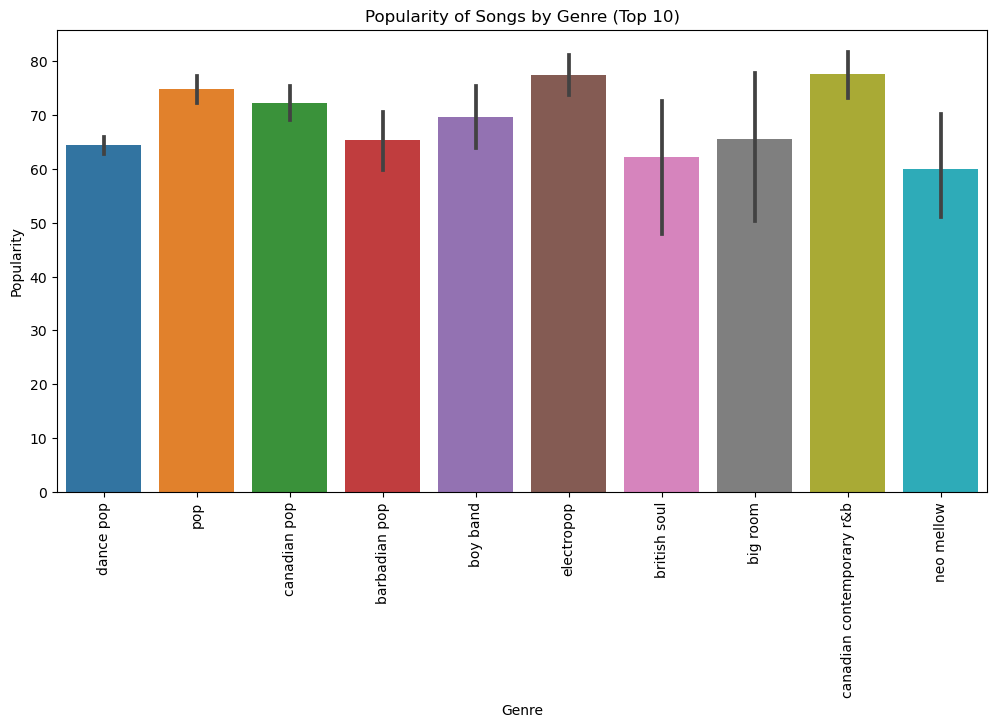

In [20]:
# Get the top 10 genres based on popularity
top10genres = songs['top genre'].value_counts().nlargest(10).index

# Filter the dataframe for the top 10 genres
dftop10genres = songs[songs['top genre'].isin(top10genres)]

# Create a bar plot of Popularity by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='top genre', y='pop', data=dftop10genres, order=top10genres)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity of Songs by Genre (Top 10)')
plt.xticks(rotation=90)
plt.show()

## Which artists are popular over time?

In [21]:
most_frequent_artists = songs["artist"].value_counts().head(5)
most_frequent_artists

artist
Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: count, dtype: int64

Additionally, we want to find out if the most common genre changes from year to year.

In [22]:
frequentgenres_year = songs.groupby("year")["top genre"].apply(lambda x: x.value_counts().index[0])
frequentgenres_year

year
2010    dance pop
2011    dance pop
2012    dance pop
2013    dance pop
2014    dance pop
2015    dance pop
2016    dance pop
2017    dance pop
2018    dance pop
2019          pop
Name: top genre, dtype: object

## What is the average energy and danceability of different genres?

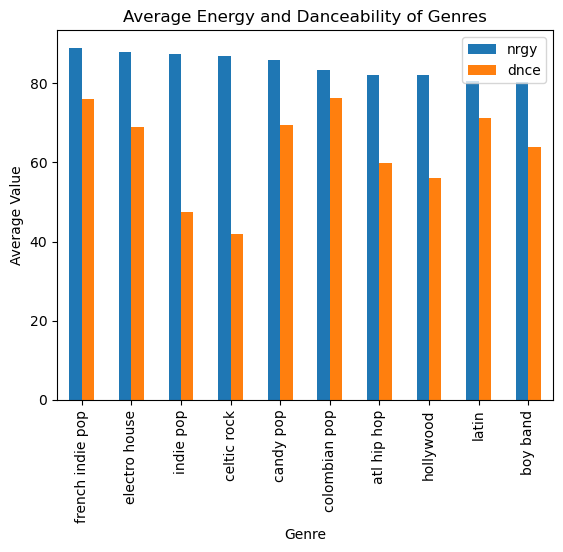

In [23]:
avg = songs.groupby('top genre')[[ 'nrgy', 'dnce']].mean()
sorted_avg = avg.sort_values(by='nrgy', ascending=False).head(10)

sorted_avg.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.title('Average Energy and Danceability of Genres')
plt.legend(loc='upper right')
plt.show()

The results above show, that "french indie pop" has the highest mean value for energy, followed by electro house and indie pop.

In [24]:
french_indiepop = songs[songs['top genre'] == 'french indie pop']
artists = french_indiepop['artist'].value_counts()
top_artists = artists.head(5)
unique_artists = french_indiepop['artist'].unique()

unique_artists
artists

artist
Lilly Wood and The Prick    1
Name: count, dtype: int64

Although the result for "french indie pop" may not be very significant, due to the fact that there is only one song in the dataset associated with this genre. 

## Does the popularity of a song correlate with its energy level?

Correlation between Popularity and Energy: -0.05764503617766647


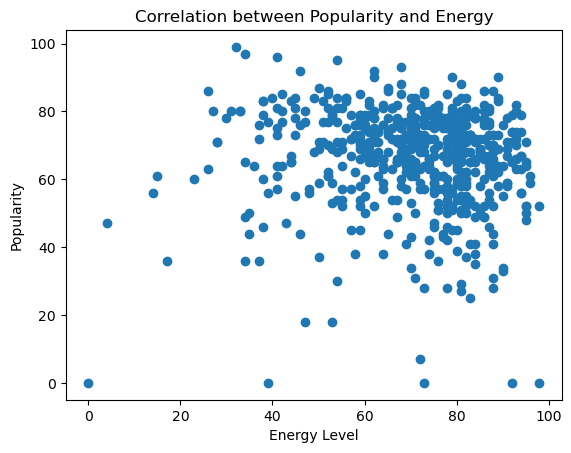

In [25]:
correlation = songs['pop'].corr(songs['nrgy'])
print("Correlation between Popularity and Energy:", correlation)

plt.scatter(songs['nrgy'], songs['pop'])
plt.xlabel('Energy Level')
plt.ylabel('Popularity')
plt.title('Correlation between Popularity and Energy')
plt.show()

The results don´t indicate a strong correlation between popularity and the energy level of a song. If so, there is a very weak negative correlation between popularity and energy.

## Is there a relationship between the tempo (bpm) and energy (nrgy) of songs?

Correlation between bpm and Energy: 0.12617006494310276


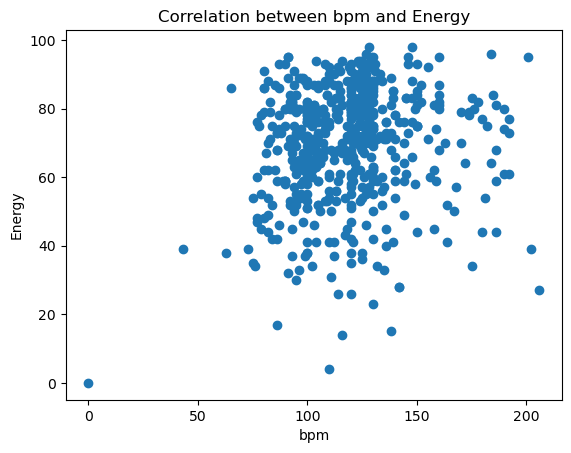

In [26]:
correlation = songs['bpm'].corr(songs['nrgy'])

# Print the correlation coefficient
print("Correlation between bpm and Energy:", correlation)

# Scatter plot of Tempo vs Energy
plt.scatter(songs['bpm'], songs['nrgy'])
plt.xlabel('bpm')
plt.ylabel('Energy')
plt.title('Correlation between bpm and Energy')
plt.show()

The results don´t indicate a strong correlation between bpm and the energy level of a song. 

## Machine Learining

### Research Question: 
Can we predict the popularity of a song based on its features?

In [27]:
songs.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

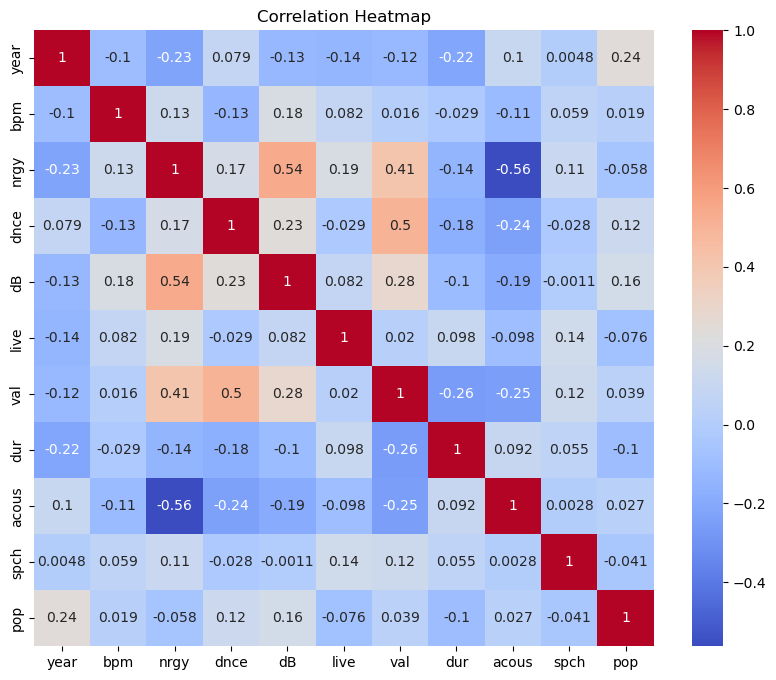

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = songs.select_dtypes(include='number')

# Calculate the correlation matrix
songs_corr = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(songs_corr, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

According to the heatmap, there are no very strong correlations in general. Based on these results, the prediciton of popularity based on the features of a song won´t be very significant. 

In [29]:
#text to binary
songs = pd.get_dummies(songs, columns = ['title','artist', 'top genre'])

In [30]:
correlation = songs['pop'].corr(songs['dB'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.15689721632507794


In [31]:
correlation = songs['pop'].corr(songs['dnce'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.1160544446144211


In [32]:
correlation = songs['pop'].corr(songs['nrgy'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.05764503617766647


In [33]:
correlation = songs['pop'].corr(songs['val'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.0389525866357596


The results above show that there is no strong correlation between any of the features and the popularity. 

In [34]:
songs.head(5)

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,top genre_house,top genre_indie pop,top genre_irish singer-songwriter,top genre_latin,top genre_metropopolis,top genre_moroccan pop,top genre_neo mellow,top genre_permanent wave,top genre_pop,top genre_tropical house
0,2010,97,89,67,-4,8,80,217,19,4,...,False,False,False,False,False,False,True,False,False,False
1,2010,87,93,75,-5,52,64,263,24,23,...,False,False,False,False,False,False,False,False,False,False
2,2010,120,84,76,-3,29,71,200,10,14,...,False,False,False,False,False,False,False,False,False,False
3,2010,119,92,70,-4,8,71,295,0,4,...,False,False,False,False,False,False,False,False,False,False
4,2010,109,84,64,-5,9,43,221,2,4,...,False,False,False,False,False,False,False,False,True,False


In [35]:
new_songs = songs.drop(["year", "live", "acous", 'spch'], axis=1)
#new_songs = pd.get_dummies(new_songs, columns = ['title','artist', 'top genre'])
new_songs

,bpm,nrgy,dnce,dB,val,dur,pop,title_#Beautiful,title_#SELFIE,title_#thatPOWER,...,top genre_house,top genre_indie pop,top genre_irish singer-songwriter,top genre_latin,top genre_metropopolis,top genre_moroccan pop,top genre_neo mellow,top genre_permanent wave,top genre_pop,top genre_tropical house
0,97,89,67,-4,80,217,83,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,87,93,75,-5,64,263,82,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,120,84,76,-3,71,200,80,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,119,92,70,-4,71,295,79,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,109,84,64,-5,43,221,78,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,104,66,61,-7,16,176,75,False,False,False,...,False,False,False,False,False,False,False,False,False,False
599,95,79,75,-6,61,206,75,False,False,False,...,False,False,False,False,False,False,False,False,True,False
600,136,76,53,-5,65,260,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
601,114,79,60,-6,24,217,69,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant columns
x = new_songs[['dnce', 'nrgy','val', 'dB']]

# Set the target variable
y = new_songs['pop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 205.23303849849816
R-squared: 0.0543375453838596


The best results are obtained with test_size = 0.4, although the mean squared error and the results for R-squared don´t look like the model is able to make a valid prognosis.

In [38]:
x = new_songs[['val', 'dnce']]
y = new_songs['pop']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 212.79483751984014
R-squared: 0.019494668836531726


I tried varying the independent variables with different combinations, not only the one shown above. It does not improve the results. The results indicate, that there seems to be no real linear-regression relationship between the variables. This machine learning model does not seem to be appropriate in the given context. 

The heatmap indicates, that there is a stronger correlation between valence (the higher the value, the more positive mood for the song) and the "dance", "energy" and "dB" values. 

In [39]:
x = new_songs[['dnce', 'nrgy','dB']]

# Set the target variable
y = new_songs['val']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 375.9485161277807
R-squared: 0.32862373145608537


The results obtained here are more significant, although still not very good. In general the use of linear regression does not lead to meaningful results in the context of this dataset. 

In [43]:
songs = pd.get_dummies(songs, columns = ['artist', 'top genre'])
x = songs[['dnce', 'nrgy','dB', 'year',  'bpm' ,  'live', 'val', 'dur', 'acous', 'spch', 'top genre' ]]

# Set the target variable
y = songs['pop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

KeyError: "None of [Index(['artist', 'top genre'], dtype='object')] are in the [columns]"

### Literature
- https://www.kaggle.com/code/aeryan/spotify-music-analysis
- https://www.kaggle.com/code/arpita28/analysis-of-spotify-trends
- https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice
- https://www.kaggle.com/code/juanreyes1738/linear-regression-for-top-50-songs
- https://www.kaggle.com/code/huanntran100/spotify-song-popularity-prediction